In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [6]:
#import requests library and api key
import requests

from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ae2902e3e010d9ab7118921cb459ff24


In [8]:
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ae2902e3e010d9ab7118921cb459ff24&q=Boston


In [9]:
weather_response = requests.get(city_url)
weather_response.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 45.68,
  'feels_like': 39.11,
  'temp_min': 38.8,
  'temp_max': 48.52,
  'pressure': 1009,
  'humidity': 51},
 'visibility': 10000,
 'wind': {'speed': 15.01, 'deg': 0, 'gust': 23},
 'clouds': {'all': 75},
 'dt': 1644531900,
 'sys': {'type': 2,
  'id': 2009921,
  'country': 'US',
  'sunrise': 1644493653,
  'sunset': 1644530972},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [11]:
boston_data = city_weather.json()

In [12]:
boston_data['sys']

{'type': 2,
 'id': 2009921,
 'country': 'US',
 'sunrise': 1644493653,
 'sunset': 1644530972}

In [13]:
boston_data["dt"]

1644531900

In [14]:
boston_data["coord"]['lat']

42.3584

In [15]:
boston_data["main"]["temp_max"]

48.52

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 48.52 51 75 15.01


In [17]:
import time
from datetime import datetime

date = boston_data["dt"]

#utc will print year / month / day / hour / minute / second
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 2, 10, 22, 25)

In [18]:
#reformat datetime
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-02-10 22:25:00'

In [19]:
#we are going to find the data for 500 cities in 10 sets of 50 cities at a time
#since we are using a free subscription with limited calls per minute we will rest for 60 secs between each set of 50
# first create an empty list to hold our city data
city_data = []
#print the beginning of data detrievel
print("Beginning Data Retrievel")
print("----------------------")

#create counters
record_count = 1
set_count = 1

Beginning Data Retrievel
----------------------


In [20]:
#create a for loop to loop through cities
for i, city in enumerate(cities):
    
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    city_url = url + "&q=" + cities[i]
    
    print(f"Processing record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing record 1 of Set 1 | kruisfontein
Processing record 2 of Set 1 | ushuaia
Processing record 3 of Set 1 | hovd
Processing record 4 of Set 1 | faanui
Processing record 5 of Set 1 | praia da vitoria
Processing record 6 of Set 1 | zabaykalsk
Processing record 7 of Set 1 | san patricio
Processing record 8 of Set 1 | port elizabeth
Processing record 9 of Set 1 | saldanha
Processing record 10 of Set 1 | hobart
Processing record 11 of Set 1 | port alfred
Processing record 12 of Set 1 | turayf
Processing record 13 of Set 1 | cape town
Processing record 14 of Set 1 | muswellbrook
Processing record 15 of Set 1 | nalut
Processing record 16 of Set 1 | alekseyevskoye
Processing record 17 of Set 1 | punta arenas
Processing record 18 of Set 1 | pevek
Processing record 19 of Set 1 | asyut
Processing record 20 of Set 1 | ribeira grande
Processing record 21 of Set 1 | tromso
Processing record 22 of Set 1 | muroto
Processing record 23 of Set 1 | rikitea
Processing record 24 of Set 1 | koumac
Proc

Processing record 40 of Set 4 | amderma
City not found. Skipping...
Processing record 41 of Set 4 | boa esperanca
Processing record 42 of Set 4 | yulara
Processing record 43 of Set 4 | khatanga
Processing record 44 of Set 4 | litovko
Processing record 45 of Set 4 | husavik
Processing record 46 of Set 4 | geraldton
Processing record 47 of Set 4 | port blair
Processing record 48 of Set 4 | te anau
Processing record 49 of Set 4 | baculin
Processing record 50 of Set 4 | tadine
Processing record 1 of Set 5 | bengkulu
Processing record 2 of Set 5 | barentsburg
City not found. Skipping...
Processing record 3 of Set 5 | bambous virieux
Processing record 4 of Set 5 | yeppoon
Processing record 5 of Set 5 | sibu
Processing record 6 of Set 5 | finschhafen
Processing record 7 of Set 5 | siddipet
Processing record 8 of Set 5 | bontang
Processing record 9 of Set 5 | benbrook
Processing record 10 of Set 5 | leningradskiy
Processing record 11 of Set 5 | redcliffe
Processing record 12 of Set 5 | kodiak


Processing record 28 of Set 8 | victoria point
Processing record 29 of Set 8 | ulaangom
Processing record 30 of Set 8 | jingdezhen
Processing record 31 of Set 8 | aginskoye
Processing record 32 of Set 8 | alcudia
Processing record 33 of Set 8 | jiujiang
Processing record 34 of Set 8 | batsfjord
Processing record 35 of Set 8 | khanpur
Processing record 36 of Set 8 | dasoguz
Processing record 37 of Set 8 | tambura
Processing record 38 of Set 8 | cumaribo
City not found. Skipping...
Processing record 39 of Set 8 | pangnirtung
Processing record 40 of Set 8 | hunucma
Processing record 41 of Set 8 | hasaki
Processing record 42 of Set 8 | great yarmouth
Processing record 43 of Set 8 | burgersdorp
Processing record 44 of Set 8 | morondava
Processing record 45 of Set 8 | tingo maria
Processing record 46 of Set 8 | bowen
Processing record 47 of Set 8 | kaputa
Processing record 48 of Set 8 | roald
Processing record 49 of Set 8 | kibaya
Processing record 50 of Set 8 | diofior
Processing record 1 o

Processing record 13 of Set 12 | noumea
Processing record 14 of Set 12 | nylstroom
City not found. Skipping...
Processing record 15 of Set 12 | sao joao do piaui
Processing record 16 of Set 12 | calama
Processing record 17 of Set 12 | mayo
Processing record 18 of Set 12 | kavaratti
Processing record 19 of Set 12 | hobyo
Processing record 20 of Set 12 | soeng sang
Processing record 21 of Set 12 | zubtsov
Processing record 22 of Set 12 | rovaniemi
Processing record 23 of Set 12 | dwarka
Processing record 24 of Set 12 | doba
Processing record 25 of Set 12 | flin flon
Processing record 26 of Set 12 | etchoropo
Processing record 27 of Set 12 | alekseyevka
Processing record 28 of Set 12 | anar darreh
City not found. Skipping...
Processing record 29 of Set 12 | uyuni
Processing record 30 of Set 12 | vastervik
City not found. Skipping...
Processing record 31 of Set 12 | haines junction
Processing record 32 of Set 12 | oktyabrskiy
Processing record 33 of Set 12 | ust-ishim
Processing record 34 

In [21]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kruisfontein,-34.0033,24.7314,61.21,88,30,2.39,ZA,2022-02-10 22:28:46
1,Ushuaia,-54.8000,-68.3000,46.06,81,75,24.16,AR,2022-02-10 22:25:36
2,Hovd,48.0056,91.6419,-7.17,98,100,2.24,MN,2022-02-10 22:28:47
3,Faanui,-16.4833,-151.7500,81.64,74,45,16.15,PF,2022-02-10 22:27:51
4,Praia Da Vitoria,38.7333,-27.0667,57.76,88,20,8.05,PT,2022-02-10 22:28:47


In [22]:
#create a csv file to hold the new dataframe
output_data_file = "weather_data/cities.csv"

#export data to file we created above
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
today = time.time()
today

1644533009.0074644

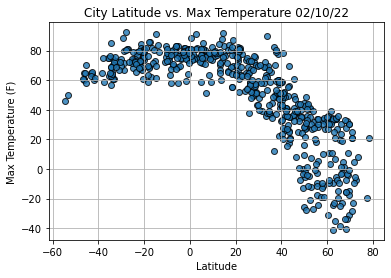

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

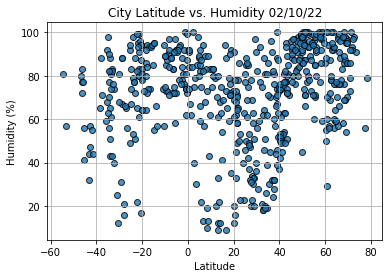

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

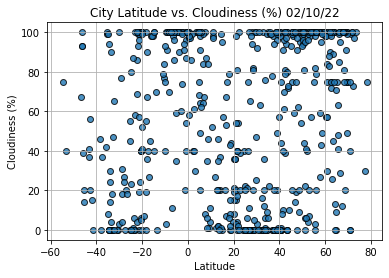

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

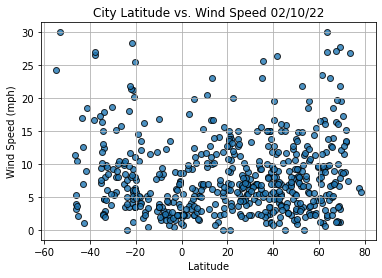

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [30]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

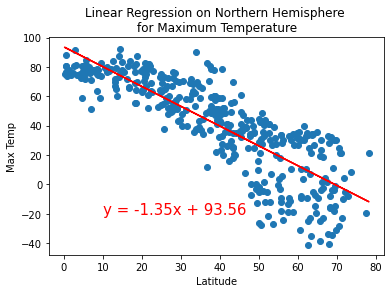

In [32]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                      'Linear Regression on Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,-20))

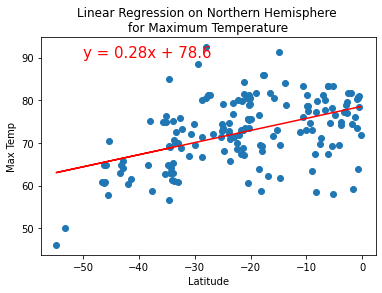

In [33]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                      'Linear Regression on Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

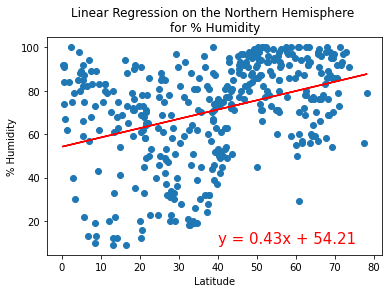

In [34]:
# Linear regression on the Northern Hemisphere humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

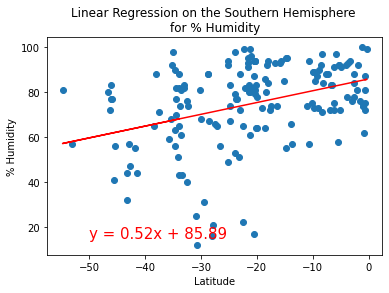

In [35]:
# Linear regression on the Southern Hemisphere humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

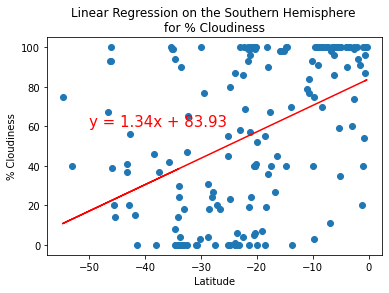

In [36]:
# Linear regression on the Southern Hemisphere cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

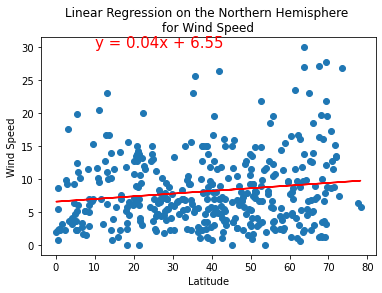

In [37]:
# Linear regression on the Northern Hemisphere wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(10,30))

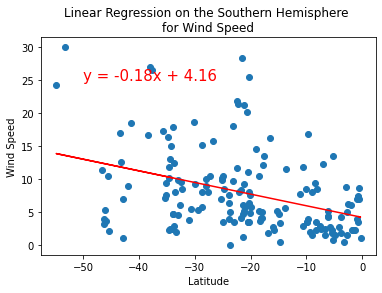

In [38]:
# Linear regression on the Southern Hemisphere wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,25))